In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv1D, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
data = pd.read_csv("/content/gdrive/MyDrive/prices-split-adjusted.csv")

In [6]:
data['date'] = pd.to_datetime(data['date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    851264 non-null  datetime64[ns]
 1   symbol  851264 non-null  object        
 2   open    851264 non-null  float64       
 3   close   851264 non-null  float64       
 4   low     851264 non-null  float64       
 5   high    851264 non-null  float64       
 6   volume  851264 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 45.5+ MB


In [8]:
specific_rows = ['GOOGL',
                'NVDA',
                'IBM',
                'PYPL',
                'UPS']

In [9]:
df1 = data[data['symbol'].isin(specific_rows)]
df1.reset_index(drop=True, inplace=True)
df1['month'] = pd.DatetimeIndex(df1.date).month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df1

,date,symbol,open,close,low,high,volume,month
0,2010-01-04,GOOGL,313.788792,313.688694,312.432438,315.070073,3908400.0,1
1,2010-01-04,IBM,131.179993,132.449997,130.850006,132.970001,6155300.0,1
2,2010-01-04,NVDA,18.510000,18.490000,18.110001,18.620001,20005100.0,1
3,2010-01-04,UPS,58.180000,58.180000,57.980000,58.820000,3897200.0,1
4,2010-01-05,GOOGL,313.903904,312.307316,311.081089,314.234226,6003300.0,1
...,...,...,...,...,...,...,...,...
7421,2016-12-30,GOOGL,803.210022,792.450012,789.619995,803.289978,1728300.0,12
7422,2016-12-30,IBM,166.440002,165.990005,165.500000,166.699997,2952800.0,12
7423,2016-12-30,NVDA,111.349998,106.739998,106.300003,111.919998,30246000.0,12
7424,2016-12-30,PYPL,39.959999,39.470001,39.340000,40.070000,5007500.0,12


In [11]:
df3 = df1.reset_index()['close']

In [12]:
df3.shape

(7426,)

In [13]:
df3

0       313.688694
1       132.449997
2        18.490000
3        58.180000
4       312.307316
           ...    
7421    792.450012
7422    165.990005
7423    106.739998
7424     39.470001
7425    114.639999
Name: close, Length: 7426, dtype: float64

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
df3 = scaler.fit_transform(np.array(df3).reshape(-1,1))

In [15]:
df3

array([[0.36863399],
       [0.14944489],
       [0.01162228],
       ...,
       [0.11835135],
       [0.03699538],
       [0.12790557]])

In [16]:
training_size = int(len(df3)*0.65)
test_size = len(df3)-training_size
train_data,test_data = df3[0:training_size,:], df3[training_size:len(df3),:1]

In [17]:
training_size, test_size

(4826, 2600)

In [18]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [19]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [20]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
print(X_train.shape), print(y_train.shape)

(4725, 100, 1)
(4725,)


(None, None)

In [25]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(32, return_sequences=True))
rnn_model.add(SimpleRNN(32, return_sequences=True))
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dense(1)) 

rnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
history = rnn_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
74/74 [==============================] - 13s 101ms/step - loss: 0.0408 - val_loss: 0.2169
Epoch 2/100
74/74 [==============================] - 5s 71ms/step - loss: 9.9661e-04 - val_loss: 0.2104
Epoch 3/100
74/74 [==============================] - 5s 71ms/step - loss: 4.3690e-04 - val_loss: 0.2036
Epoch 4/100
74/74 [==============================] - 5s 70ms/step - loss: 2.6385e-04 - val_loss: 0.1965
Epoch 5/100
74/74 [==============================] - 5s 71ms/step - loss: 1.8891e-04 - val_loss: 0.1917
Epoch 6/100
74/74 [==============================] - 5s 70ms/step - loss: 1.4118e-04 - val_loss: 0.1877
Epoch 7/100
74/74 [==============================] - 5s 71ms/step - loss: 9.5216e-05 - val_loss: 0.1850
Epoch 8/100
74/74 [==============================] - 5s 70ms/step - loss: 7.2835e-05 - val_loss: 0.1840
Epoch 9/100
74/74 [==============================] - 5s 68ms/step - loss: 5.7411e-05 - val_loss: 0.1832
Epoch 10/100
74/74 [==============================] - 5s 72ms/step

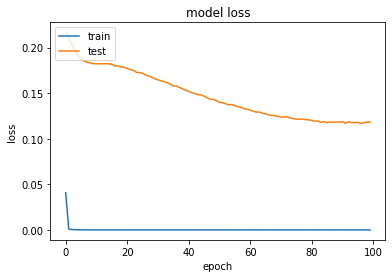

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
train_predict = rnn_model.predict(X_train)
test_predict = rnn_model.predict(X_test)

In [33]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [34]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

214.39814139661425

In [35]:
math.sqrt(mean_squared_error(y_test,test_predict))

243.79853923122775

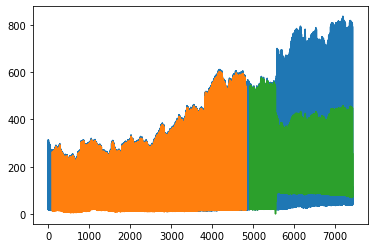

In [36]:
look_back=100
trainPredictPlot = np.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(df3)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df3))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()